<a href="https://colab.research.google.com/github/YusunPark/DeepLearning/blob/main/3_1k_%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

113p
이번에는
- `무언가를 고르는 문제` X
- `생선의 무게를 예측해야함`

-> 정확하게 측정한 샘플을 토대로 무게를 예측하려고 한다.

-> 내년도 경제 성장률을 예측, 배달이 도착할 시간을 예측하는 것들이 회귀 문제이다.


## 데이터 준비

In [ ]:
import numpy as np

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
import matplotlib.pyplot as plt

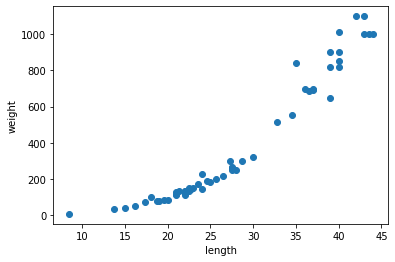

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 훈련세트, 테스트 세트를 나눔 
# 사이킷런에서 사용할 훈련세트는 2차원이여야한다. (행, 열이 있는 것)
# random_state=42 : 학습을 위한 설정 (항상 같은 랜덤수가 나오게)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [ ]:
# input이 1차원 배열이였기에 -> 2차원 배열로 shape를 변경한다.
print(train_input.shape, test_input.shape)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# 테스트 세트의 점수를 확인합니다.

knr.score(test_input, test_target)

0.9928094061010639

모델을 평가 (score)할때 사용하는 지표

- 분류 -> 정확도
- 회귀 -> 결정계수 (R^2)

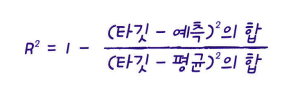

$ R^2$ 는 정확도처럼 얼마나 좋은지 한번에 확인하기가 어렵니다.

-> sklearn.metrics 패키지(여러가지 측정 도구를 제공)의 mean_absolute_error 를 이용한다.
  - mean_absolute_error : 타깃과 예측의 절댓값 오차를 평균하여 반환

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# 테스트 세트에 대한 예측을 만들고 -> 평균 절댓값 오차를 계산한다.

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

train으로 훈련시킨 데이터이기 때문에 보통 점수는 train 세트 > test 세트 이다.

그런데 그 차이가 너무나 심하게 차이가 나면 
- 과대적합(train ↑), 
- 과소적합(test ↑, 둘다 너무 낮은 경우)이라고 판단한다.

그 이유로는 
1. 모델이 너무 단순하여서 훈련 세트에서 적절히 훈련되지 않은 경우
2. 훈련세트/ 테스트세트의 크기가 매우 작기 때문에

---

- 과대적합일 경우 모델을 덜 복잡하게 만들어야 합니다.k-최근접 이웃의 경우 k 값을 늘립니다. 
- 과소 
적합일 경우모벨을 더 복잡하게 어야합니다. k-최근접 이웃의 경우 값을줄이는것입니다. 

In [ ]:
print("train set :", knr.score(train_input, train_target))
print("test set :", knr.score(test_input, test_target))
print("------- 과소 적합 -------")

train set : 0.9698823289099255
test set : 0.9928094061010639
------- 과소 적합 -------


In [ ]:
# 모델을 복잡하게 만들기 위해서 이웃의 수를 줄인다 (5 -> 3)

knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("train set :", knr.score(train_input, train_target))
print("test set :", knr.score(test_input, test_target))
print("------- 과소 적합 해결 -------")

train set : 0.9804899950518966
test set : 0.974645996398761
------- 과소 적합 해결 -------


## 확인문제 2번

과대적합과 과소적합에 대한  이해를 돕기 위해 복잡한 모델과 단순한 모벨을 만들겠습니다. <br>

앞서 만든 k 최근접 이웃 회귀 모벨의 k 값을 1, 5, 10으로 바꿔가며 훈련해 보세요. <br> 그다음 농어의 길이를 에서 45까지 바꿔가며 측을 만들어 그래프로 나타내 보세요.<br>
n 이 커짐에 따라 모델이 단순해지는 것을 볼 수 있나요?

train set : 0.9852830341215901
test set : 0.991309195814175


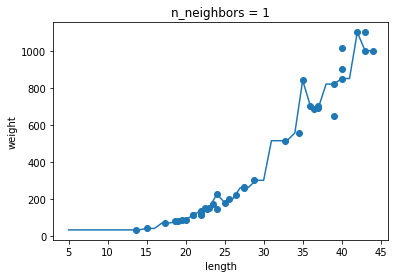

train set : 0.9698823289099255
test set : 0.9928094061010639


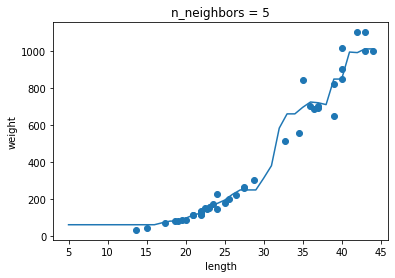

train set : 0.9616456902604301
test set : 0.9737908255822255


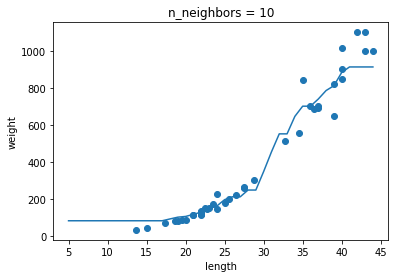

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # score 점수
  print("train set :", knr.score(train_input, train_target))
  print("test set :", knr.score(test_input, test_target))

  # 지정한 범위 x에 대한 예측
  prediction = knr.predict(x)

  # 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(f'n_neighbors = {n}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()